<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#Obtain-data" data-toc-modified-id="Obtain-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Obtain data</a></span><ul class="toc-item"><li><span><a href="#drop-duplicate-tweets" data-toc-modified-id="drop-duplicate-tweets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>drop duplicate tweets</a></span></li><li><span><a href="#missing-data" data-toc-modified-id="missing-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>missing data</a></span><ul class="toc-item"><li><span><a href="#missing-tweet-data" data-toc-modified-id="missing-tweet-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>missing tweet data</a></span></li><li><span><a href="#missing-product-data" data-toc-modified-id="missing-product-data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>missing product data</a></span></li></ul></li><li><span><a href="#remove-twitter-handles-from-tweet-text" data-toc-modified-id="remove-twitter-handles-from-tweet-text-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>remove twitter handles from tweet text</a></span></li><li><span><a href="#clean-tweet-text" data-toc-modified-id="clean-tweet-text-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>clean tweet text</a></span></li></ul></li><li><span><a href="#sentiment-column-clean-up" data-toc-modified-id="sentiment-column-clean-up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>sentiment column clean up</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Tokenize-terms" data-toc-modified-id="Tokenize-terms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tokenize terms</a></span><ul class="toc-item"><li><span><a href="#stopwords-assessment-and-removal" data-toc-modified-id="stopwords-assessment-and-removal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>stopwords assessment and removal</a></span></li><li><span><a href="#tokenize,-lemmatize,-stemming" data-toc-modified-id="tokenize,-lemmatize,-stemming-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>tokenize, lemmatize, stemming</a></span></li></ul></li><li><span><a href="#further-exploration-of-only-positive-and-negative-sentiment" data-toc-modified-id="further-exploration-of-only-positive-and-negative-sentiment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>further exploration of only positive and negative sentiment</a></span><ul class="toc-item"><li><span><a href="#of-only-positive-and-negative-sentiment" data-toc-modified-id="of-only-positive-and-negative-sentiment-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>of only positive and negative sentiment</a></span></li><li><span><a href="#assess-word-frequency" data-toc-modified-id="assess-word-frequency-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>assess word frequency</a></span></li></ul></li></ul></div>

In [1]:
#import modules for Obtain/Scrub/Explore
import re
import pandas as pd 
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#import modules for tokenizing and stemming 
from nltk.collocations import *
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
from nltk import pos_tag
from collections import defaultdict
from nltk.stem import WordNetLemmatizer 
from collections import Counter
from nltk.tokenize.treebank import TreebankWordTokenizer, TreebankWordDetokenizer
from nltk.probability import FreqDist

## functions

In [4]:
# function using contraction dictionary to replace/expand contractions
cList = {
  "ain't": "aint",
  "aren't": "are not",
  "can't": "can not",
  "can't've": "can not have",
  "'cause": "because",
  "bc": "because",
  "b/c": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [5]:
# function to clean up characters and unwanted items from tweet text
def scrub_tweet(df):
    for x in df:
        # expand contractions
        df = df.apply(expandContractions)
        # remove hash from tweet column, keeping word following hashtag
        df = df.str.replace(r"#", " ")
        # remove hyperlinks and {link}
        df = df.str.replace(r"(?:\@|http?\://|https?\://|www)\S+", " ")
        df = df.str.replace(r'{link}', " ")
        # remove random characters and punctuation
        df = df.str.replace(r'[^a-zA-Z]', " ")
        #remove digits
        df = df.str.replace(r'\d', " ")
        # deal with apostrophes
        df = df.str.replace(r'(\')', " ")
        # remove individual/single chars
        df = df.str.replace(r'\b[a-z]\b', "")
        # remove double spaces
        df = df.str.replace(r'  ', " ")
        return df

In [6]:
stopwords_list = (stopwords.words('english')) 
add_stopwords = ('apple', 'ipad', 'iphone', 'android', 'ipadiphone', 'google', 'rt', 
                 'sxsw', 'sxswi', 'g', 'c', 'b', 'w', 't', 's', 'austin', )
stopwords_list.extend(add_stopwords)

stopwords_list.remove('not')

In [7]:
# function to remove stopwords from tweet pre-tokenize
def remove_stop_text(df):
    temp= df.apply(lambda x: ' '.join([word for word in x.split() 
                                                if word not in (stopwords_list)]))
    return temp


In [8]:
# function to remove stopwords from tweet post-tokenize
def stop_rem(words):
    tokens = [
    w for w in words 
        if w not in stopwords_list
    ]

In [9]:
# apply defined tokenizer to text
def toke_text(words):
    tokens = tokenizer.tokenize(words)
    return tokens


In [10]:
# apply defined lemmatizer to tokens
def lem_text(tokens):
    new_df = [lemmatizer.lemmatize(x) for x in tokens]
    return new_df

In [11]:
# apply defined stemmer to tokens
def stem_text(tokens):
    new_df = [stemmer.stem(x) for x in tokens]
    return new_df

In [12]:
# word frequency top 50
def top_50(df):
    temp = df.to_list()
    temp2 = [i for j in temp for i in j]
    temp_freqdist = FreqDist(temp2)
    print('50 MOST common words:', (temp_freqdist.most_common(50)))
    print('Total:', (len(temp_freqdist)))
    return (len(temp_freqdist))


# Obtain data

In [75]:
data = pd.read_csv('data/data.csv', sep=',')

In [76]:
data.tweet_text.iloc[4]

"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)"

In [77]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [78]:
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [79]:
data.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [80]:
data.shape

(8721, 3)

## drop duplicate tweets

In [81]:
dups = data[data.duplicated(subset=['tweet_text'])]
print(len(dups))

27


In [82]:
data = data.drop_duplicates(subset='tweet_text', keep='first')

In [83]:
data.shape

(8694, 3)

In [84]:
data = data.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': "product", 'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})

##  missing data

### missing tweet data

In [85]:
data['tweet'].isna().sum()

1

In [86]:
data.isna().sum()

tweet           1
product      5536
sentiment       0
dtype: int64

In [87]:
data.dropna(subset=['tweet'], axis=0, inplace=True)

In [25]:
data.shape

(8693, 3)

In [26]:
data['tweet'].isna().sum()

0

### missing product data

In [27]:
# make tweet text lowercase for continuity
data['product'] = data['product'].str.lower()

In [28]:
data['product'].isna().sum()

5535

In [29]:
# make tweet text lowercase for continuity
data['tweet'] = data['tweet'].str.lower()

In [30]:
# fill product column using keywords from tweet text
data.loc[(data['product'].isnull()) & (data['tweet'].str.contains('ipad')), 'product'] = 'ipad'
data.loc[(data['product'].isnull()) & (data['tweet'].str.contains('iphone')), 'product'] = 'iphone'                                     
data.loc[(data['product'].isnull()) & (data['tweet'].str.contains('apple')), 'product'] = 'apple'
data.loc[(data['product'].isnull()) & (data['tweet'].str.contains('android')), 'product'] = 'android'
data.loc[(data['product'].isnull()) & (data['tweet'].str.contains('google')), 'product'] = 'google'
data.loc[(data['product'].isnull()) & (data['tweet'].str.contains('itunes')), 'product'] = 'apple app'

In [31]:
data['product'].unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service', nan,
       'apple app', 'other apple product or service'], dtype=object)

In [32]:
data.dropna(subset=['product'], axis=0, inplace=True)

In [33]:
data.shape

(8014, 3)

In [34]:
data['product'].unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service',
       'apple app', 'other apple product or service'], dtype=object)

In [35]:
# update values in product column
data['product'] = data['product'].replace(['other apple product or service'], 'apple other')
data['product'] = data['product'].replace(['ipad or iphone app'], 'apple app')
data['product'] = data['product'].replace(['ipad'], 'apple ipad')
data['product'] = data['product'].replace(['iphone'], 'apple iphone')
data['product'] = data['product'].replace(['android app'], 'android app')
data['product'] = data['product'].replace(['android'], 'android')
data['product'] = data['product'].replace(['google'], 'google')
data['product'] = data['product'].replace(['other google product or service'], 'google other')
data['product'] = data['product'].replace(['apple'], 'apple')

## remove twitter handles from tweet text

In [36]:
#remove @mentions
data['tweet'] = data.apply(lambda row: 
    nltk.tokenize.casual.remove_handles(row['tweet']), axis=1)

In [37]:
from bs4 import BeautifulSoup
#HTML decoding
data['tweet'] = data.apply(lambda row: 
                           BeautifulSoup(row['tweet']).get_text().replace('\n',' '),
                           axis=1)

In [38]:
data.head()

,tweet,product,sentiment
0,. i have a 3g iphone. after 3 hrs tweeting at...,apple iphone,Negative emotion
1,know about ? awesome ipad/iphone app that yo...,apple app,Positive emotion
2,can not wait for #ipad 2 also. they should sal...,apple ipad,Positive emotion
3,i hope this year's festival isn't as crashy as...,apple app,Negative emotion
4,great stuff on fri #sxsw: marissa mayer (googl...,google,Positive emotion


## clean tweet text

In [39]:
# scrub/ clean tweet text with function using regex for lower, punctuation, websites, prep for tokenizing
data['clean_tweet'] = scrub_tweet(data['tweet'])

# sentiment column clean up

In [40]:
# update values in sentiment column
data['sentiment'] = data['sentiment'].replace(['Negative emotion'], 'negative')
data['sentiment'] = data['sentiment'].replace(['Positive emotion'], 'positive')
data['sentiment'] = data['sentiment'].replace(['No emotion toward brand or product'], 'neutral')
data['sentiment'] = data['sentiment'].replace(['I can\'t tell'], 'unknown')

In [41]:
data.sentiment.describe()

count        8014
unique          4
top       neutral
freq         4476
Name: sentiment, dtype: object

In [42]:
# assess 'unknown' sentiment values
data.loc[data['sentiment']=='unknown']

,tweet,product,sentiment,clean_tweet
100,"��� ""apple has opened a pop-up store in austi...",apple ipad,unknown,apple has opened pop up store in austin so ...
228,just what america needs. rt google to launch...,google,unknown,just what america needs rt google to launch m...
330,the queue at the apple store in austin is four...,apple,unknown,the queue at the apple store in austin is four...
357,hope it's better than wave rt buzz is: googl...,google,unknown,hope it is better than wave rt buzz is google...
402,syd #sxsw crew your iphone extra juice pods ha...,apple iphone,unknown,syd sxsw crew your iphone extra juice pods hav...
...,...,...,...,...
8650,it's funny watching a room full of people hold...,apple ipad,unknown,it is funny watching room full of people hold ...
8662,"yeah, we have , google has nothing on us :) ...",google,unknown,yeah we have google has nothing on us sxsw
8667,"yes, the google presentation was not exactly w...",google,unknown,yes the google presentation was not exactly wh...
8687,"""do you know what apple is really good at? mak...",apple ipad,unknown,do you know what apple is really good at maki...


# Explore

Text(0.5, 1.0, 'Product by Sentiment')

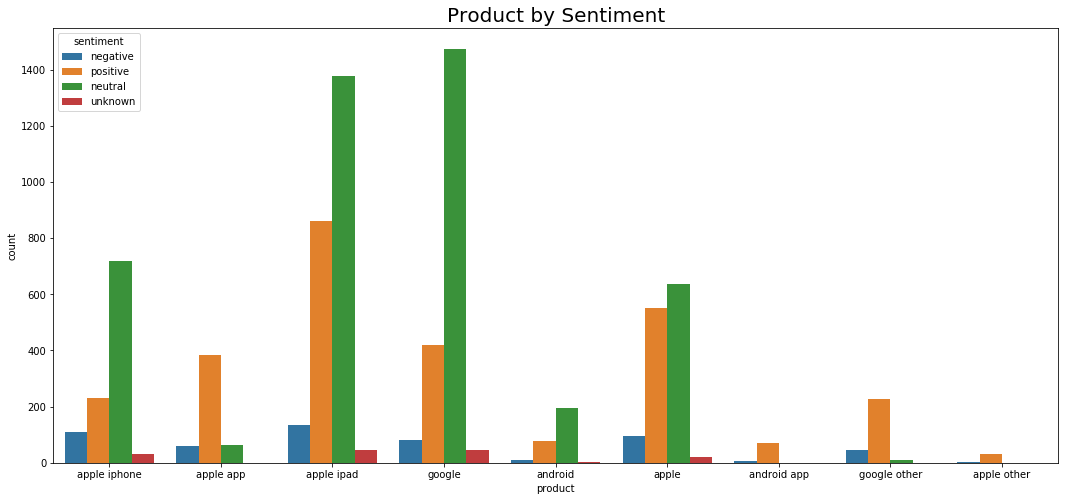

In [43]:
fig, ax = plt.subplots(figsize=(18,8))
x = data['product']
hue = data['sentiment']
ax = sns.countplot(x, hue=hue, data=data)
plt.title('Product by Sentiment', fontsize=20)


In [44]:
data.columns

Index(['tweet', 'product', 'sentiment', 'clean_tweet'], dtype='object')

In [45]:
brand_df = data.copy()
brand_df.drop(['tweet',  'clean_tweet'], axis=1, inplace=True)

# update values in product column
brand_df.loc[(brand_df['product'].str.contains('apple')), 'product'] = 'apple'
brand_df.loc[(brand_df['product'].str.contains('android')), 'product'] = 'android/google'
brand_df.loc[(brand_df['product'].str.contains('google')), 'product'] = 'android/google'
brand_df.head()

,product,sentiment
0,apple,negative
1,apple,positive
2,apple,positive
3,apple,negative
4,android/google,positive


Text(0.5, 1.0, 'Brand by Sentiment')

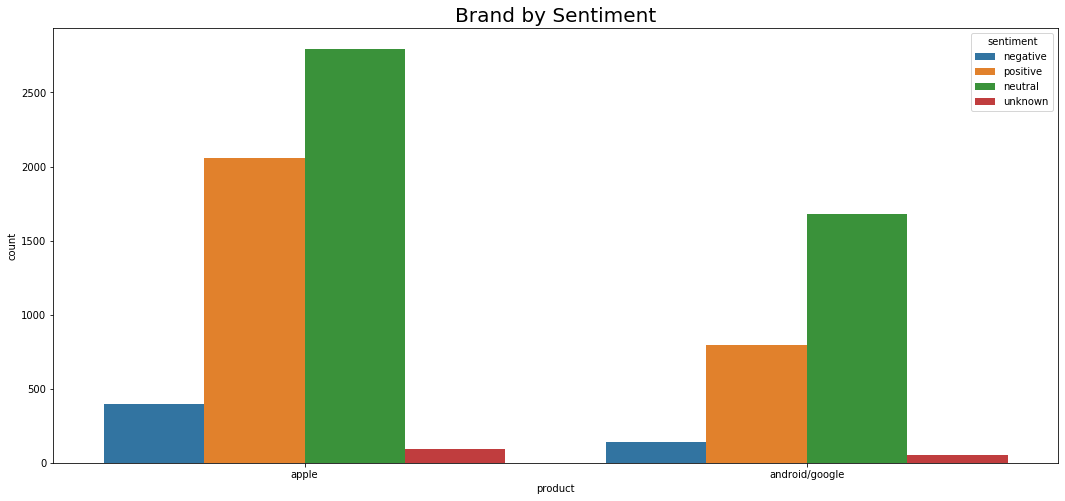

In [46]:
fig, ax = plt.subplots(figsize=(18,8))
x = brand_df['product']
hue = brand_df['sentiment']
ax = sns.countplot(x, hue=hue, data=data)
plt.title('Brand by Sentiment', fontsize=20)

In [47]:
data['product'].value_counts(normalize=True)

apple ipad      0.301348
google          0.252433
apple           0.162965
apple iphone    0.135887
apple app       0.063015
android         0.035313
google other    0.035188
android app     0.009608
apple other     0.004243
Name: product, dtype: float64

/Users/badmin/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Product Count')

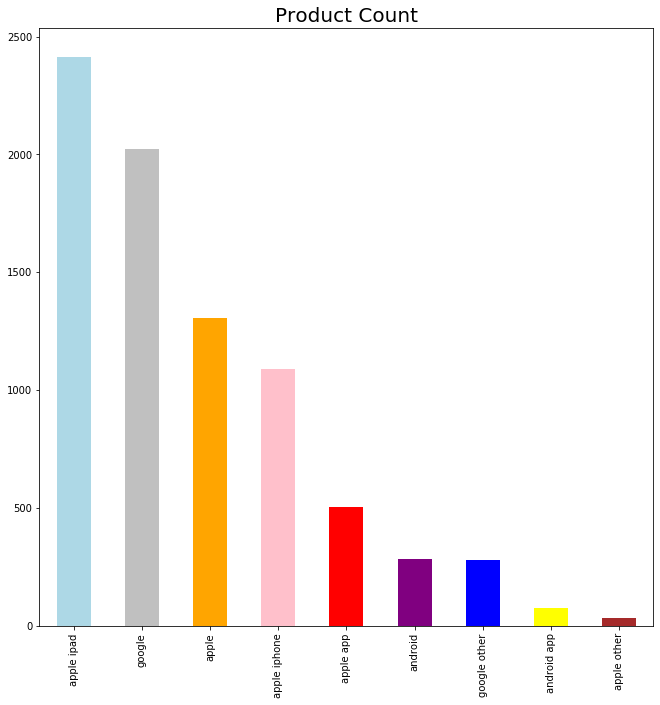

In [48]:
plt.figure(figsize=(11,11))
colors = ['lightblue', 'silver', 'orange', 'pink', 'red', 'purple', 'blue', 'yellow', 'brown']
expl = (0, 0.1)
data['product'].value_counts().plot(kind='bar', legend=False, colors=colors)
plt.title('Product Count', fontsize=20)

In [49]:
data['sentiment'].value_counts()

neutral     4476
positive    2849
negative     543
unknown      146
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Count')

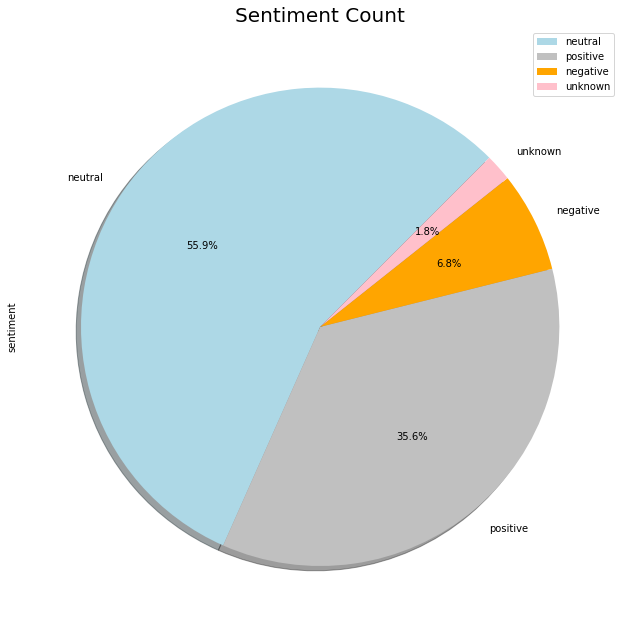

In [50]:
plt.figure(figsize=(11,11))
colors = ['lightblue', 'silver', 'orange', 'pink']
expl = (0, 0.1)
data.sentiment.value_counts().plot(kind='pie', legend=True, startangle=45, shadow=True, 
                             colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Count', fontsize=20)

In [51]:
import itertools
# pre cleaned corpus
corpus1 = list(itertools.chain(*[nltk.word_tokenize(tok) for tok in data.tweet]))
print(len(corpus1))

179247


# Tokenize terms

## stopwords assessment and removal

In [52]:
# remove stopwords from tweet text
data['words'] = remove_stop_text(data.clean_tweet)

## tokenize, lemmatize, stemming

In [53]:
#tokenizer = RegexpTokenizer("[\w']+")
stemmer = nltk.stem.SnowballStemmer('english')
tokenizer = TreebankWordTokenizer()
detokenizer = TreebankWordDetokenizer()
lemmatizer = lemmatizer = WordNetLemmatizer() 

In [54]:
# tokenize/stem tweet text
data['tokenized'] = data.words.map(toke_text)
#data['tokens'] = data.tokenized.map(stem_text)
data['tokens'] = [stem_text(tok) for tok in data.tokenized]
data['tokenl'] = [lem_text(tok) for tok in data.tokenized]

data['wordl'] = [detokenizer.detokenize(tok) for tok in data.tokenl]
data['wordss'] = [detokenizer.detokenize(tok) for tok in data.tokens]
data['pos_s'] = data.tokens.map(pos_tag)
data['pos_l'] = data.tokenl.map(pos_tag)

In [55]:
data.isnull().sum()

tweet          0
product        0
sentiment      0
clean_tweet    0
words          0
tokenized      0
tokens         0
tokenl         0
wordl          0
wordss         0
pos_s          0
pos_l          0
dtype: int64

In [56]:
# post cleaned corpus for stemmed tokens
corpus_s = list(itertools.chain(*[nltk.word_tokenize(tok) for tok in data.words]))
print(len(corpus_s))

64432


In [57]:
# post cleaned corpus for lemmatized tokens
corpus_l = list(itertools.chain(*[nltk.word_tokenize(tok) for tok in data.wordl]))
print(len(corpus_l))

64398


In [58]:
# map binary target labels to 'target' category
data['target'] = data['sentiment'].map( {'positive':1, 'negative':0, 'neutral':3, 'unknown':4} )

# further exploration of only positive and negative sentiment

## of only positive and negative sentiment

In [59]:
# create dataframe with only positive and negative sentiment
df = data.copy()
df = df[df['sentiment'].isin(['positive', 'negative']) ]
col = ['wordss', 'tokens', 'wordl', 'tokenl', 'pos_s', 'pos_l', 'sentiment', 'target']
df = df[col]
df.to_csv('pn_df.csv')


In [60]:
# Creating the dicti
word_dict = {} 

for row in df.wordss: 
    words = tokenizer.tokenize(row) 
    for word in words: 
        if word not in word_dict.keys(): 
            word_dict[word] = 1
        else: 
            word_dict[word] += 1
print(len(word_dict))
max(word_dict, key=word_dict.get)

4295


'store'

In [61]:
# get unique word count
word_dict_l = {} 
for row in df.wordl: 
    words = tokenizer.tokenize(row) 
    for word in words: 
        if word not in word_dict_l.keys(): 
            word_dict_l[word] = 1
        else: 
            word_dict_l[word] += 1
print(len(word_dict_l))
max(word_dict_l, key=word_dict_l.get)

5059


'store'

In [62]:
# print max number of tokens in any row
rows = df.tokenl.astype(str)
maxlen=-1
for row in rows:
    tokens = row.split(',')
    token_cnt = len(tokens)
    longest_token = max(tokens)
    if(maxlen<len(tokens)):
        maxlen=len(tokens)
print("The maximum number of words in any document is : ",maxlen)

The maximum number of words in any document is :  17


##  assess word frequency 

In [63]:
from wordcloud import WordCloud

In [64]:
# top 50 on stemmed and lemmatized data
terms_total = top_50(df.tokens)
terml_total = top_50(df.tokenl)



50 MOST common words: [('store', 584), ('app', 545), ('not', 439), ('new', 394), ('get', 237), ('pop', 223), ('launch', 217), ('open', 185), ('go', 184), ('one', 168), ('line', 165), ('time', 164), ('use', 162), ('like', 159), ('parti', 159), ('circl', 158), ('come', 157), ('social', 155), ('win', 151), ('day', 147), ('great', 138), ('via', 134), ('today', 132), ('map', 125), ('cool', 122), ('free', 120), ('love', 118), ('look', 115), ('peopl', 111), ('network', 110), ('good', 107), ('mobil', 107), ('check', 105), ('see', 105), ('awesom', 103), ('need', 97), ('got', 97), ('thank', 91), ('temporari', 89), ('call', 88), ('downtown', 86), ('year', 84), ('think', 84), ('design', 83), ('take', 82), ('make', 80), ('even', 80), ('user', 78), ('mayer', 76), ('first', 75)]
Total: 4293
50 MOST common words: [('store', 584), ('not', 439), ('app', 437), ('new', 394), ('pop', 219), ('get', 199), ('launch', 188), ('one', 168), ('line', 162), ('circle', 158), ('party', 156), ('time', 154), ('like', 1

In [65]:
pos_df = df[df['sentiment']=='positive']
neg_df = df[df['sentiment']=='negative']

In [66]:
# top 50 on positive sentiment tokens stemmed and lemmatized 
top_50(pos_df.tokens)
top_50(pos_df.tokenl)

50 MOST common words: [('store', 538), ('app', 461), ('new', 353), ('not', 280), ('pop', 206), ('get', 203), ('launch', 188), ('open', 176), ('go', 158), ('parti', 152), ('win', 149), ('one', 146), ('time', 142), ('line', 142), ('come', 139), ('use', 132), ('great', 130), ('day', 126), ('social', 125), ('circl', 123), ('via', 122), ('free', 118), ('cool', 118), ('like', 115), ('map', 115), ('today', 112), ('love', 111), ('awesom', 99), ('check', 99), ('mobil', 95), ('good', 93), ('network', 93), ('look', 91), ('got', 90), ('see', 90), ('downtown', 85), ('temporari', 84), ('thank', 83), ('peopl', 82), ('make', 72), ('popup', 72), ('even', 71), ('call', 68), ('mayer', 67), ('year', 67), ('around', 65), ('first', 64), ('market', 64), ('user', 63), ('want', 63)]
Total: 3699
50 MOST common words: [('store', 538), ('app', 379), ('new', 353), ('not', 280), ('pop', 203), ('get', 174), ('launch', 167), ('party', 150), ('one', 146), ('line', 140), ('time', 132), ('great', 130), ('day', 126), ('c

4334

In [67]:
from wordcloud import WordCloud

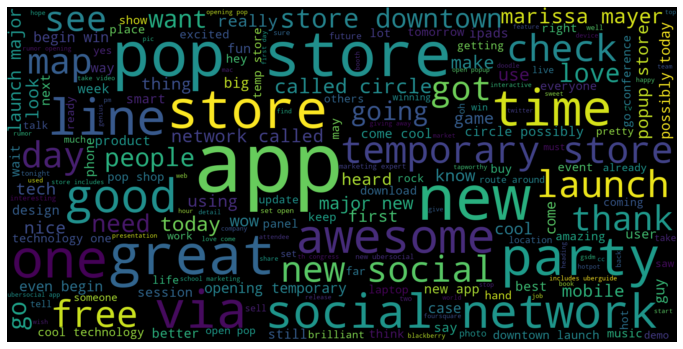

In [68]:
#plot word cloud
pos_words = []
for t in pos_df.wordl:
    pos_words.append(t)
pos_text = pd.Series(pos_words).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
# top 50 on negative sentiment tokens stemmed and lemmatized 
top_50(neg_df.tokens)
top_50(neg_df.tokenl)

50 MOST common words: [('not', 159), ('app', 84), ('store', 46), ('like', 44), ('new', 41), ('need', 35), ('circl', 35), ('get', 34), ('social', 30), ('use', 30), ('design', 29), ('peopl', 29), ('launch', 29), ('go', 26), ('think', 24), ('look', 24), ('line', 23), ('one', 22), ('time', 22), ('day', 21), ('would', 21), ('take', 21), ('say', 20), ('call', 20), ('today', 20), ('come', 18), ('phone', 18), ('fail', 18), ('year', 17), ('pop', 17), ('network', 17), ('talk', 17), ('headach', 16), ('long', 16), ('product', 16), ('tweet', 15), ('user', 15), ('wait', 15), ('news', 15), ('batteri', 15), ('thing', 15), ('see', 15), ('much', 15), ('compani', 15), ('america', 15), ('back', 14), ('tri', 14), ('money', 14), ('major', 14), ('realli', 14)]
Total: 1628
50 MOST common words: [('not', 159), ('app', 58), ('store', 46), ('like', 43), ('new', 41), ('need', 35), ('circle', 35), ('social', 30), ('people', 29), ('design', 27), ('apps', 26), ('get', 25), ('think', 23), ('line', 22), ('one', 22), (

1808

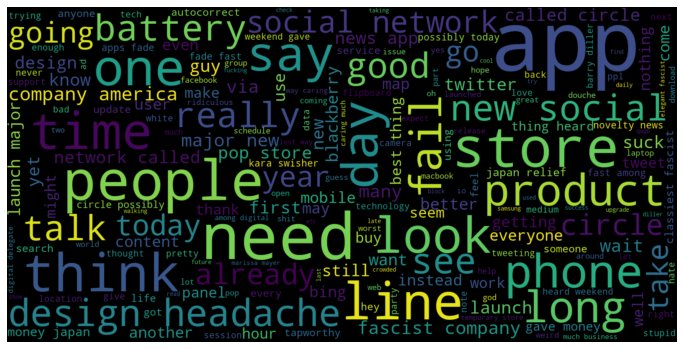

In [70]:
#plot negative word cloud
neg_words = []
for t in neg_df.wordl:
    neg_words.append(t)
neg_text = pd.Series(neg_words).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Sentiment Count')

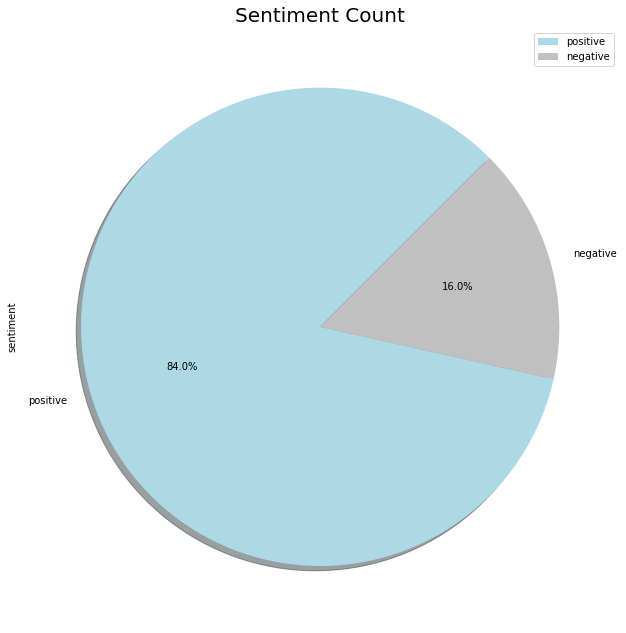

In [71]:
plt.figure(figsize=(11,11))
colors = ['lightblue', 'silver']
expl = (0, 0.1)
df.sentiment.value_counts().plot(kind='pie', legend=True, startangle=45, shadow=True, 
                             colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Count', fontsize=20)

In [72]:
tokens = []
for sent in df.wordl:
    #print(tokenizer.tokenize(sent))
    tokens.append(tokenizer.tokenize(sent))

In [73]:
df.head()

,wordss,tokens,wordl,tokenl,pos_s,pos_l,sentiment,target
0,hrs tweet rise dead need upgrad plugin station,"[hrs, tweet, rise, dead, need, upgrad, plugin,...",hr tweeting rise dead need upgrade plugin station,"[hr, tweeting, rise, dead, need, upgrade, plug...","[(hrs, NN), (tweet, NN), (rise, NN), (dead, JJ...","[(hr, NN), (tweeting, VBG), (rise, NN), (dead,...",negative,0
1,know awesom app like appreci design also give ...,"[know, awesom, app, like, appreci, design, als...",know awesome app likely appreciate design also...,"[know, awesome, app, likely, appreciate, desig...","[(know, VB), (awesom, JJ), (app, NNS), (like, ...","[(know, VB), (awesome, JJ), (app, NNS), (likel...",positive,1
2,not wait also sale,"[not, wait, also, sale]",not wait also sale,"[not, wait, also, sale]","[(not, RB), (wait, NN), (also, RB), (sale, NN)]","[(not, RB), (wait, NN), (also, RB), (sale, NN)]",positive,1
3,hope year festiv not crashi year app,"[hope, year, festiv, not, crashi, year, app]",hope year festival not crashy year app,"[hope, year, festival, not, crashy, year, app]","[(hope, NN), (year, NN), (festiv, RB), (not, R...","[(hope, NN), (year, NN), (festival, NN), (not,...",negative,0
4,great stuff fri marissa mayer tim reilli tech ...,"[great, stuff, fri, marissa, mayer, tim, reill...",great stuff fri marissa mayer tim reilly tech ...,"[great, stuff, fri, marissa, mayer, tim, reill...","[(great, JJ), (stuff, NN), (fri, NN), (marissa...","[(great, JJ), (stuff, NN), (fri, NN), (marissa...",positive,1
